In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cab_data=pd.read_csv('Cab_Data.csv')
city=pd.read_csv('City.csv')
customers=pd.read_csv('Customer_ID.csv')
transactions=pd.read_csv('Transaction_ID.csv')

# Understanding the data

Checking headers

In [5]:
cab_data.head()

,Transaction ID,date of travel,company,city,km traveled,price_charged,cost_of_trip,profit,profit per km
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.88227
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.82690
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.04956
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.77775
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.92944


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [7]:
customers.head()

,Customer ID,Gender,Age,Income
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Checking the numbers of rows and columns

In [12]:
cab_data.shape

(440098, 3)

In [13]:
city.shape

(20, 3)

In [14]:
customers.shape

(49171, 4)

In [15]:
transactions.shape

(440098, 3)

Checking unique values for each attribute

In [16]:
cab_data.nunique() #One of the cities in the city table is redundant. no transactions were recorded there (We can find out which using MySQL)

Transaction ID    359392
date of travel      1095
company                2
city                  19
km traveled          874
price_charged      99176
cost_of_trip       16291
profit            245949
profit per km     315165
dtype: int64

In [17]:
city.nunique()

City          20
Population    20
Users         20
dtype: int64

In [18]:
customers.nunique() #there are less transactions(cab_data table) than customers. which could only mean that some of the customers in this table never interacted with either company

Customer ID    49171
Gender             2
Age               48
Income         23341
dtype: int64

In [19]:
transactions.nunique() #there are more transactions here than the cab_data table. which means that alot of the transactions have no data on the cab rides

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

Quantitative desciption of attributes

In [28]:
cab_data.describe().drop(labels=['Transaction ID'], axis=1)

,km traveled,price_charged,cost_of_trip,profit,profit per km
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198,6.083579
std,12.233526,274.378911,157.993661,160.311840,5.543493
min,1.900000,15.600000,19.000000,-220.060000,-4.998240
25%,12.000000,206.437500,151.200000,28.012000,2.000382
50%,22.440000,386.360000,282.480000,81.962000,4.466810
75%,32.960000,583.660000,413.683200,190.030000,9.170008
max,48.000000,2048.030000,691.200000,1463.966000,41.115560


In [29]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [31]:
customers.describe().drop(labels=['Customer ID'], axis=1)

,Age,Income
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [41]:
transactions.mode(axis=0, numeric_only=False)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,494.0,Card
1,10000012,NaN,NaN
2,10000013,NaN,NaN
3,10000014,NaN,NaN
4,10000015,NaN,NaN
...,...,...,...
440093,10440104,NaN,NaN
440094,10440105,NaN,NaN
440095,10440106,NaN,NaN
440096,10440107,NaN,NaN



# Cleaning the data

Checking for null values

In [43]:
cab_data.isnull().sum()




Transaction ID    0
date of travel    0
company           0
city              0
km traveled       0
price_charged     0
cost_of_trip      0
profit            0
profit per km     0
dtype: int64

In [44]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [45]:
customers.isnull().sum()

Customer ID    0
Gender         0
Age            0
Income         0
dtype: int64

In [46]:
transactions.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Relationship analysis

Cab_data


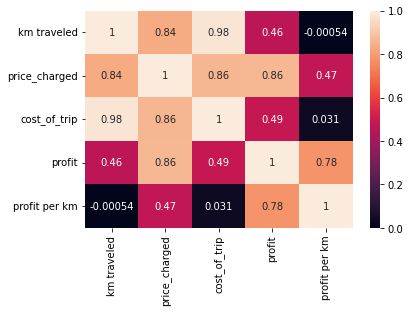

In [55]:
cab_data_corr=cab_data.drop(labels=['Transaction ID'], axis=1).corr()
sns.heatmap(cab_data_corr,xticklabels=cab_data_corr.columns,yticklabels=cab_data_corr.columns,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


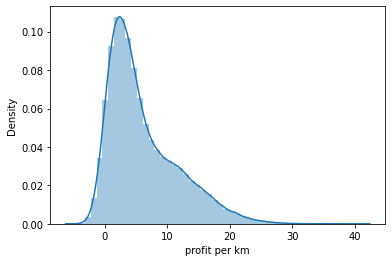

In [60]:
sns.distplot(cab_data.iloc[:,-1])

City

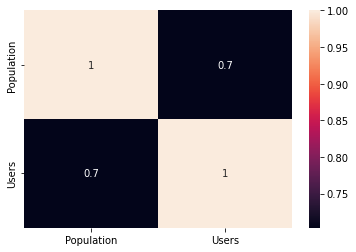

In [49]:
city_corr=city.corr()
sns.heatmap(city_corr,xticklabels=city_corr.columns,yticklabels=city_corr.columns,annot=True)

Customers

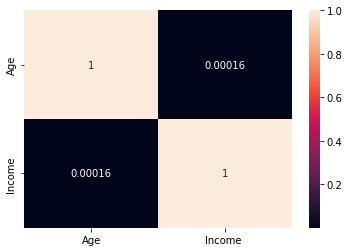

In [56]:
customers_corr=customers.drop(labels=['Customer ID'], axis=1).corr()
sns.heatmap(customers_corr,xticklabels=customers_corr.columns,yticklabels=customers_corr.columns,annot=True)

N/A for the Transactions table

#Hypotheses

1.Which company has maximum cab users at a particular time period?






2.Does margin proportionally increase with increase in number of customers?

3.What are the useful attributes of these customer segments?

4.Which company is more profitable in a given city?

5.Which company should encourage more card payments to reduce the spread of disease?


6.Which company can retain the higher number of customers?

7.Which company is more adaptable to market turbulations?


8.Does the total population of a city affect the cab user's habits?